# Observations


1 The max city temperature follows a parabolic arc with the apex centered 20 degrees north of the equator.

2 The humidity varies the least between 0 and 20 degrees latitude where the humidity does not dip below 60%.

3 Windspeeds peak at the equator around -40 degree and 70 degrees. 

In [6]:
# Dependencies
import json
from citipy import citipy
import requests
import random as rdm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from config import api_key

In [7]:
# # Save config information
# url = "http://api.openweathermap.org/data/2.5/box/city?"
# bbox = '-180,-80,80,180,100'
# # bbox = '-140,-40,75,100,20'
# params = {'APPID': api_key, 'bbox': bbox}

# weather_response = requests.get(url, params=params)
# weather_json = weather_response.json()

# print(json.dumps(weather_json, indent=4))

In [8]:
# print(len(weather_json['list']))
# length = len(weather_json['list'])
# print(weather_json['list'][2190]['name'])

In [9]:
# random_index = rdm.sample(range(0, length), 500)
# # np.unique(data, return_counts=True)


In [10]:
# random_city= []

# for x in random_index:
#     random_city.append(weather_json['list'][x])

In [11]:
from random import uniform

def newpoint():
   return uniform(-180,180), uniform(-90, 90)

coords = []

points = (newpoint() for x in range(4000))
for point in points:
    coords.append(point)
print(coords[0])

(107.50591550058073, 70.57282005313425)


In [12]:
cities = []

for coord in coords:
    city = (citipy.nearest_city(coord[0],coord[1]))
    name = city.city_name
    if name not in cities:
        cities.append(name)
    else:
        pass
len(cities)

772

In [13]:
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={api_key}&q="

removed = []
names = []
country = []
lat = []
lon = []
temp = []
wind_spd = []
humidity = []
clouds = []
ID = []
date = []

for city in cities:
    response1 = requests.get(query_url + city + '&units=metric')
    response = response1.json()
#     print(response)
    try:
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        wind_spd.append(response['wind']['speed'])
        clouds.append(response['clouds']['all'])
        humidity.append(response['main']['humidity'])
        ID.append(response['id'])
        date.append(response['dt'])
        country.append(response['sys']['country'])
        names.append(response['name'])
    except:
        cities.remove(city)
        print(response1, 'City not foud', city ,' removed.')
        removed.append(city)
   

<Response [404]> City not foud barentsburg  removed.
<Response [404]> City not foud illoqqortoormiut  removed.
<Response [404]> City not foud belushya guba  removed.
<Response [404]> City not foud olafsvik  removed.
<Response [404]> City not foud bobo dioulasso  removed.
<Response [404]> City not foud toliary  removed.
<Response [404]> City not foud grand river south east  removed.
<Response [404]> City not foud marv dasht  removed.
<Response [404]> City not foud ketchenery  removed.
<Response [404]> City not foud amderma  removed.
<Response [404]> City not foud tsihombe  removed.
<Response [404]> City not foud umzimvubu  removed.
<Response [404]> City not foud sinkat  removed.
<Response [404]> City not foud rolim de moura  removed.
<Response [404]> City not foud sakakah  removed.
<Response [404]> City not foud umm jarr  removed.
<Response [404]> City not foud scottsburgh  removed.
<Response [404]> City not foud korla  removed.
<Response [404]> City not foud bardiyah  removed.
<Respons

In [24]:
print(len(cities), len(removed))
print(len(country), len(lat), len(lon), len(temp), len(wind_spd), len(humidity), len(clouds), len(ID), len(date))

704 68
636 636 636 636 636 636 636 636 636


In [15]:
weather_dic = {'City': names, 'Country': country, 'Date': date, 'Humidity': humidity, 'Lat': lat, 'Lon': lon, 
               'Max Temperature (C)': temp, 'Wind Speed': wind_spd, 'Cloudiness %': clouds}

weather_df = pd.DataFrame(weather_dic)
weather_df.head(10)

,City,Cloudiness %,Country,Date,Humidity,Lat,Lon,Max Temperature (C),Wind Speed
0,Dikson,92,RU,1532562501,100,73.51,80.55,5.19,10.72
1,Punta Arenas,40,CL,1532559600,80,-53.16,-70.91,4.00,5.70
2,Serdobsk,80,RU,1532562501,74,52.46,44.21,19.34,4.47
3,Qaanaaq,32,GL,1532562502,90,77.48,-69.36,3.24,0.42
4,Cape Town,20,ZA,1532559600,76,-33.93,18.42,14.00,5.70
5,Dhidhdhoo,20,MV,1532562502,100,6.88,73.10,26.59,7.47
6,Skibbereen,40,IE,1532559600,93,51.55,-9.27,16.00,4.10
7,Bredasdorp,20,ZA,1532562460,94,-34.53,20.04,13.44,3.57
8,Porto Belo,90,BR,1532560800,100,-27.15,-48.54,18.00,5.10
9,Ushuaia,20,AR,1532559600,60,-54.81,-68.31,4.00,7.92


In [16]:
weather_df.to_csv('Output/weather_data.csv')

In [25]:
# Key Reference
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={api_key}&q="

response = requests.get(query_url + 'Bredasdorp' + '&units=metric').json()
json.dumps(response)

'{"coord": {"lon": 20.04, "lat": -34.53}, "weather": [{"id": 801, "main": "Clouds", "description": "few clouds", "icon": "02n"}], "base": "stations", "main": {"temp": 13.44, "pressure": 1033.35, "humidity": 94, "temp_min": 13.44, "temp_max": 13.44, "sea_level": 1038.2, "grnd_level": 1033.35}, "wind": {"speed": 3.57, "deg": 160.5}, "clouds": {"all": 20}, "dt": 1532563207, "sys": {"message": 0.3548, "country": "ZA", "sunrise": 1532583490, "sunset": 1532620493}, "id": 1015776, "name": "Bredasdorp", "cod": 200}'

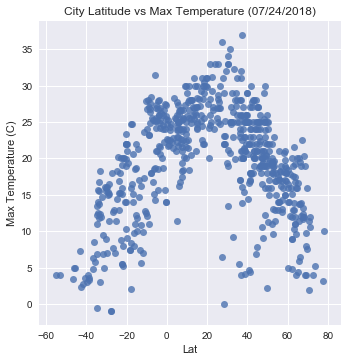

In [18]:
sns.set(style='darkgrid')


fig1 = sns.lmplot('Lat', 'Max Temperature (C)', data=weather_df, fit_reg=False)
plt.title('City Latitude vs Max Temperature (07/24/2018)')

fig1.savefig('Output/max_temp.png')

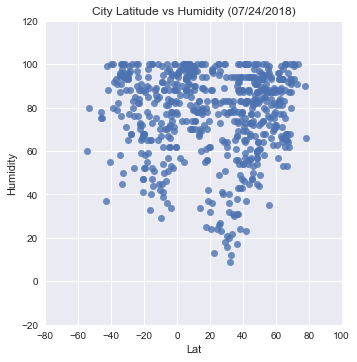

In [19]:
fig2 = sns.lmplot('Lat', 'Humidity', data=weather_df, fit_reg=False)

plt.title('City Latitude vs Humidity (07/24/2018)')
plt.ylim(-20, 120)
plt.xlim(-80,100)

fig2.savefig('Output/humidity.png')

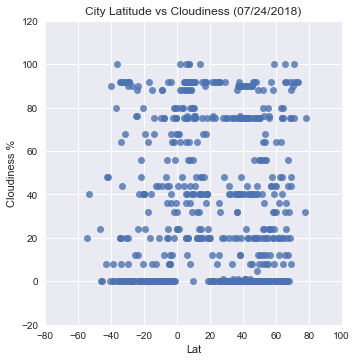

In [20]:
fig3 = sns.lmplot('Lat', 'Cloudiness %', data=weather_df, fit_reg=False)

plt.title('City Latitude vs Cloudiness (07/24/2018)')
plt.ylim(-20, 120)
plt.xlim(-80,100)

fig3.savefig('Output/cloudiness.png')

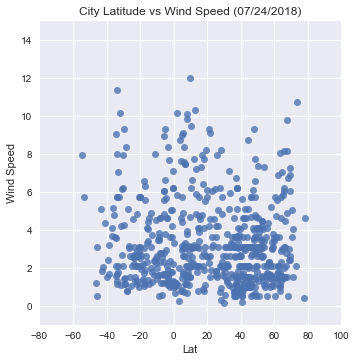

In [21]:
fig4 = sns.lmplot('Lat', 'Wind Speed', data=weather_df, fit_reg=False)

plt.title('City Latitude vs Wind Speed (07/24/2018)')
plt.ylim(-1, 15)
plt.xlim(-80,100)

fig4.savefig('Output/wind_speed.png')

In [26]:
sum(1 for x in lat if x <0)


185

In [27]:
sum(1 for x in lat if x >0)

451